In [1]:
import ganja.io as io
import ganja.preprocessing as preprocessing
import ganja.utils as utils

Welcome to ROOTaaS 6.06/05


In [20]:
reload(io)
reload(preprocessing)

# import ROOT as RT

from glob import glob

class Parameters(utils.Parameters):
    base = utils.param('/scratch/musella/ganja/production')
    prod = utils.param('nov2')
    folder = utils.param('QCD_Pt_30to50')
    
    inpfiles = utils.param('ganjaTree_0.root')
    ijob = utils.param(0)
    outdir = utils.param('.')

class MyApp(utils.MyApp):
    classes = utils.List([Parameters])

# Read all parameters above from command line. 
# Note: names are all converted to be all capital
notebook_parameters = Parameters(MyApp()).get_params()

notebook_parameters['BASE'] += '/'+notebook_parameters['PROD']

# copy parameters to global scope
globals().update(notebook_parameters)

notebook_parameters

{'BASE': u'/scratch/musella/ganja/production/nov2',
 'FOLDER': u'QCD_Pt_30to50',
 'IJOB': 0,
 'INPFILES': u'ganjaTree_0.root',
 'OUTDIR': u'.',
 'PROD': u'nov2'}

In [21]:
fnames = glob(BASE+'/'+FOLDER+'/'+INPFILES)

#arr,gen,reco 
%time df,gen,reco = io.read_root(fnames,'ganja/ganjaTree',inpshape=(130,130,1),crop_left=1,rebin_as=(32,32,1)) #,post_process=preprocessing.rescale_by_pt)

CPU times: user 48 s, sys: 4.53 s, total: 52.5 s
Wall time: 54.9 s


In [22]:
# import gc
# gc.collect()

In [36]:
# reload(utils)

try:
    nevents = utils.read_nevents(fnames,BASE,'data/%s.json' % PROD)
    njets = gen.shape[0]

    print(nevents,njets,float(njets)/nevents)
except:
    nevents = -1

In [33]:
df.describe()

,eta,etaGen,nPU,phi,phiGen,pt,ptGen,rho
count,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000,55484.000000
mean,-7.426133,0.010878,8.770276,0.001811,-0.001283,33.425213,32.393879,5.334974
std,85.891968,1.917750,4.438356,1.808155,1.815163,11.573483,9.746435,2.965174
min,-999.000000,-5.770833,0.000000,-3.141352,-3.141532,0.000000,6.063566,0.000000
25%,-1.442560,-1.419798,5.000000,-1.559139,-1.572909,25.696829,25.742838,3.126506
50%,-0.019014,-0.000578,8.000000,0.000000,0.007497,32.568409,31.528568,4.854292
75%,1.421616,1.442589,12.000000,1.554263,1.565140,40.299592,37.985374,7.042256
max,5.076285,5.264451,29.000000,3.141535,3.141487,113.313782,105.946205,23.506729


In [34]:
def show(img,gen,reco,df):
    row = df.loc[img]
    # print(row)
    plt.figure(figsize=(15,3.5))
    plt.subplot(131)
    plt.title("gen (pt,eta) = (%1.2g,%1.2g)" % (row.ptGen,row.etaGen) )
    plt.xlabel('$i\eta$')
    plt.ylabel('$i\phi$')    
    plt.imshow(gen[img,:,:,0],cmap='Reds')
    plt.colorbar()
    plt.subplot(132)
    plt.title("reco (pt,eta) = (%1.2g,%1.2g)" % (row.pt,row.eta) )
    plt.xlabel('$i\eta$')
    plt.ylabel('$i\phi$')    
    plt.imshow(reco[img,:,:,0],cmap='Reds')
    plt.colorbar()
    plt.subplot(133)
    plt.title("reco-true (GeV/area)" )
    plt.xlabel('$i\eta$')
    plt.ylabel('$i\phi$')    
    plt.imshow( (reco[img,:,:,0]-gen[img,:,:,0])*row.ptGen,vmin=-5,vmax=5)
    plt.colorbar()
    plt.show()

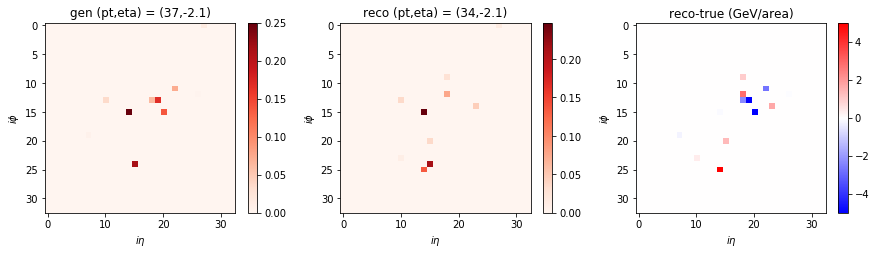

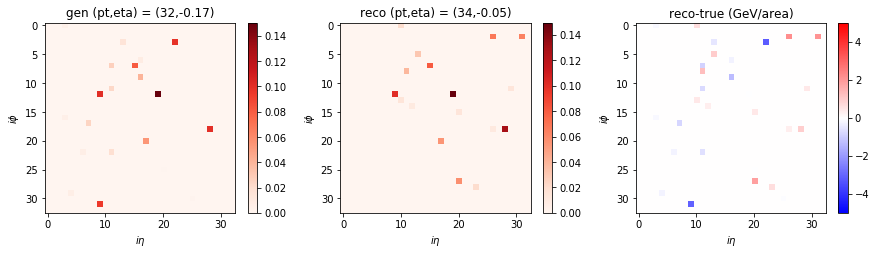

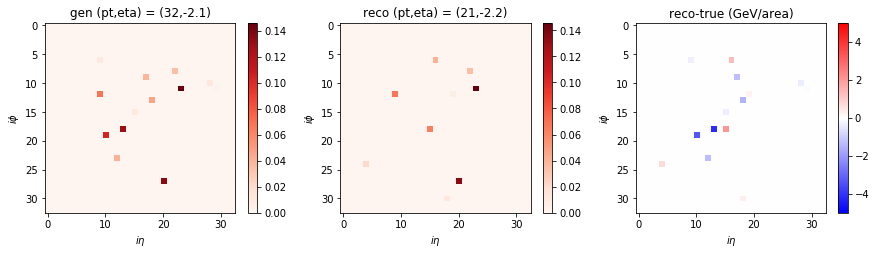

In [37]:
random_images = np.random.choice(df.index.values, 3)

for img in random_images:
    show(img,gen,reco,df)

In [38]:
import os
# reload(io)

outdir = OUTDIR+'/'+PROD
if not os.path.exists(outdir):
    os.mkdir(outdir)

io.write_out(outdir,FOLDER,IJOB,{'fnames' : fnames, 'nevents' : nevents}, df, gen, reco)

In [10]:
# del df
# del gen
# del reco
# # gc.collect()

In [11]:
# gc.collect()